# Traditional Method - ML


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/manufacturing dataset.csv')
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",600)
pd.set_option("display.width", 1100)

In [8]:
dataset = pd.DataFrame(data)
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

In [10]:
dataset.shape

(1567, 592)

In [11]:
dataset.columns = 'features_'+dataset.columns

In [14]:
dataset.head(1)

,Time,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45,features_46,features_47,features_48,features_49,features_50,features_51,features_52,features_53,features_54,features_55,features_56,features_57,features_58,features_59,features_60,features_61,features_62,features_63,features_64,features_65,features_66,features_67,features_68,features_69,features_70,features_71,features_72,features_73,features_74,features_75,features_76,features_77,features_78,features_79,features_80,features_81,features_82,features_83,features_84,features_85,features_86,features_87,features_88,features_89,features_90,features_91,features_92,features_93,features_94,features_95,features_96,features_97,features_98,features_99,features_100,features_101,features_102,features_103,features_104,features_105,features_106,features_107,features_108,features_109,features_110,features_111,features_112,features_113,features_114,features_115,features_116,features_117,features_118,features_119,features_120,features_121,features_122,features_123,features_124,features_125,features_126,features_127,features_128,features_129,features_130,features_131,features_132,features_133,features_134,features_135,features_136,features_137,features_138,features_139,features_140,features_141,features_142,features_143,features_144,features_145,features_146,features_147,features_148,features_149,features_150,features_151,features_152,features_153,features_154,features_155,features_156,features_157,features_158,features_159,features_160,features_161,features_162,features_163,features_164,features_165,features_166,features_167,features_168,features_169,features_170,features_171,features_172,features_173,features_174,features_175,features_176,features_177,features_178,features_179,features_180,features_181,features_182,features_183,features_184,features_185,features_186,features_187,features_188,features_189,features_190,features_191,features_192,features_193,features_194,features_195,features_196,features_197,features_198,features_199,features_200,features_201,features_202,features_203,features_204,features_205,features_206,features_207,features_208,features_209,features_210,features_211,features_212,features_213,features_214,features_215,features_216,features_217,features_218,features_219,features_220,features_221,features_222,features_223,features_224,features_225,features_226,features_227,features_228,features_229,features_230,features_231,features_232,features_233,features_234,features_235,features_236,features_237,features_238,features_239,features_240,features_241,features_242,features_243,features_244,features_245,features_246,features_247,features_248,features_249,features_250,features_251,features_252,features_253,features_254,features_255,features_256,features_257,features_258,features_259,features_260,features_261,features_262,features_263,features_264,features_265,features_266,features_267,features_268,features_269,features_270,features_271,features_272,features_273,features_274,features_275,features_276,features_277,features_278,features_279,features_280,features_281,features_282,features_283,features_284,features_285,features_286,features_287,features_288,features_289,features_290,features_291,features_292,features_293,features_294,features_295,features_296,features_297,features_298,features_299,features_300,features_301,features_302,features_303,features_304,features_305,features_306,features_307,features_308,features_309,features_310,features_311,features_312,features_313,features_314,features_

In [13]:
dataset.rename(columns = {'features_Time':'Time'}, inplace=True)
dataset.rename(columns = {'features_Pass/Fail':'Pass/Fail'}, inplace=True)

In [15]:
dataset.dtypes

Time             object
features_0      float64
features_1      float64
features_2      float64
features_3      float64
                 ...   
features_586    float64
features_587    float64
features_588    float64
features_589    float64
Pass/Fail         int64
Length: 592, dtype: object

In [23]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
features_0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
features_1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
features_2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
features_3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
features_4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
features_5,1553.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
features_6,1553.0,101.112908,6.237214,82.1311,97.920000,101.51220,104.586700,129.2522
features_7,1558.0,0.121822,0.008961,0.0000,0.121100,0.12240,0.123800,0.1286
features_8,1565.0,1.462862,0.073897,1.1910,1.411200,1.46160,1.516900,1.6564
features_9,1565.0,-0.000841,0.015116,-0.0534,-0.010800,-0.00130,0.008400,0.0749


In [18]:
pd.set_option("display.max_rows",1500)
pd.set_option("display.max_columns",600)
pd.set_option("display.width", 1500)

In [19]:
dataset.isnull().sum()

Time               0
features_0         6
features_1         7
features_2        14
features_3        14
features_4        14
features_5        14
features_6        14
features_7         9
features_8         2
features_9         2
features_10        2
features_11        2
features_12        2
features_13        3
features_14        3
features_15        3
features_16        3
features_17        3
features_18        3
features_19       10
features_20        0
features_21        2
features_22        2
features_23        2
features_24        2
features_25        2
features_26        2
features_27        2
features_28        2
features_29        2
features_30        2
features_31        2
features_32        1
features_33        1
features_34        1
features_35        1
features_36        1
features_37        1
features_38        1
features_39        1
features_40       24
features_41       24
features_42        1
features_43        1
features_44        1
features_45        1
features_46  

In [24]:
# Task : please handle missing value basis your traditional approach
df = dataset.iloc[:,1:]
df.head(1)

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45,features_46,features_47,features_48,features_49,features_50,features_51,features_52,features_53,features_54,features_55,features_56,features_57,features_58,features_59,features_60,features_61,features_62,features_63,features_64,features_65,features_66,features_67,features_68,features_69,features_70,features_71,features_72,features_73,features_74,features_75,features_76,features_77,features_78,features_79,features_80,features_81,features_82,features_83,features_84,features_85,features_86,features_87,features_88,features_89,features_90,features_91,features_92,features_93,features_94,features_95,features_96,features_97,features_98,features_99,features_100,features_101,features_102,features_103,features_104,features_105,features_106,features_107,features_108,features_109,features_110,features_111,features_112,features_113,features_114,features_115,features_116,features_117,features_118,features_119,features_120,features_121,features_122,features_123,features_124,features_125,features_126,features_127,features_128,features_129,features_130,features_131,features_132,features_133,features_134,features_135,features_136,features_137,features_138,features_139,features_140,features_141,features_142,features_143,features_144,features_145,features_146,features_147,features_148,features_149,features_150,features_151,features_152,features_153,features_154,features_155,features_156,features_157,features_158,features_159,features_160,features_161,features_162,features_163,features_164,features_165,features_166,features_167,features_168,features_169,features_170,features_171,features_172,features_173,features_174,features_175,features_176,features_177,features_178,features_179,features_180,features_181,features_182,features_183,features_184,features_185,features_186,features_187,features_188,features_189,features_190,features_191,features_192,features_193,features_194,features_195,features_196,features_197,features_198,features_199,features_200,features_201,features_202,features_203,features_204,features_205,features_206,features_207,features_208,features_209,features_210,features_211,features_212,features_213,features_214,features_215,features_216,features_217,features_218,features_219,features_220,features_221,features_222,features_223,features_224,features_225,features_226,features_227,features_228,features_229,features_230,features_231,features_232,features_233,features_234,features_235,features_236,features_237,features_238,features_239,features_240,features_241,features_242,features_243,features_244,features_245,features_246,features_247,features_248,features_249,features_250,features_251,features_252,features_253,features_254,features_255,features_256,features_257,features_258,features_259,features_260,features_261,features_262,features_263,features_264,features_265,features_266,features_267,features_268,features_269,features_270,features_271,features_272,features_273,features_274,features_275,features_276,features_277,features_278,features_279,features_280,features_281,features_282,features_283,features_284,features_285,features_286,features_287,features_288,features_289,features_290,features_291,features_292,features_293,features_294,features_295,features_296,features_297,features_298,features_299,features_300,features_301,features_302,features_303,features_304,features_305,features_306,features_307,features_308,features_309,features_310,features_311,features_312,features_313,features_314,features_315,f

In [25]:
df = df.apply(lambda x:x.fillna(0), axis=0)

In [26]:
df.isnull().any()

features_0      False
features_1      False
features_2      False
features_3      False
features_4      False
features_5      False
features_6      False
features_7      False
features_8      False
features_9      False
features_10     False
features_11     False
features_12     False
features_13     False
features_14     False
features_15     False
features_16     False
features_17     False
features_18     False
features_19     False
features_20     False
features_21     False
features_22     False
features_23     False
features_24     False
features_25     False
features_26     False
features_27     False
features_28     False
features_29     False
features_30     False
features_31     False
features_32     False
features_33     False
features_34     False
features_35     False
features_36     False
features_37     False
features_38     False
features_39     False
features_40     False
features_41     False
features_42     False
features_43     False
features_44     False
features_4

In [27]:
df2 = dataset.iloc[:,0]
df2.head()

0    2008-07-19 11:55:00
1    2008-07-19 12:32:00
2    2008-07-19 13:17:00
3    2008-07-19 14:43:00
4    2008-07-19 15:22:00
Name: Time, dtype: object

In [28]:
result = pd.concat([df, df2], axis=1).reindex(df.index)
result.head()

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45,features_46,features_47,features_48,features_49,features_50,features_51,features_52,features_53,features_54,features_55,features_56,features_57,features_58,features_59,features_60,features_61,features_62,features_63,features_64,features_65,features_66,features_67,features_68,features_69,features_70,features_71,features_72,features_73,features_74,features_75,features_76,features_77,features_78,features_79,features_80,features_81,features_82,features_83,features_84,features_85,features_86,features_87,features_88,features_89,features_90,features_91,features_92,features_93,features_94,features_95,features_96,features_97,features_98,features_99,features_100,features_101,features_102,features_103,features_104,features_105,features_106,features_107,features_108,features_109,features_110,features_111,features_112,features_113,features_114,features_115,features_116,features_117,features_118,features_119,features_120,features_121,features_122,features_123,features_124,features_125,features_126,features_127,features_128,features_129,features_130,features_131,features_132,features_133,features_134,features_135,features_136,features_137,features_138,features_139,features_140,features_141,features_142,features_143,features_144,features_145,features_146,features_147,features_148,features_149,features_150,features_151,features_152,features_153,features_154,features_155,features_156,features_157,features_158,features_159,features_160,features_161,features_162,features_163,features_164,features_165,features_166,features_167,features_168,features_169,features_170,features_171,features_172,features_173,features_174,features_175,features_176,features_177,features_178,features_179,features_180,features_181,features_182,features_183,features_184,features_185,features_186,features_187,features_188,features_189,features_190,features_191,features_192,features_193,features_194,features_195,features_196,features_197,features_198,features_199,features_200,features_201,features_202,features_203,features_204,features_205,features_206,features_207,features_208,features_209,features_210,features_211,features_212,features_213,features_214,features_215,features_216,features_217,features_218,features_219,features_220,features_221,features_222,features_223,features_224,features_225,features_226,features_227,features_228,features_229,features_230,features_231,features_232,features_233,features_234,features_235,features_236,features_237,features_238,features_239,features_240,features_241,features_242,features_243,features_244,features_245,features_246,features_247,features_248,features_249,features_250,features_251,features_252,features_253,features_254,features_255,features_256,features_257,features_258,features_259,features_260,features_261,features_262,features_263,features_264,features_265,features_266,features_267,features_268,features_269,features_270,features_271,features_272,features_273,features_274,features_275,features_276,features_277,features_278,features_279,features_280,features_281,features_282,features_283,features_284,features_285,features_286,features_287,features_288,features_289,features_290,features_291,features_292,features_293,features_294,features_295,features_296,features_297,features_298,features_299,features_300,features_301,features_302,features_303,features_304,features_305,features_306,features_307,features_308,features_309,features_310,features_311,features_312,features_313,features_314,features_315,f

In [29]:
result['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

In [30]:
result['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

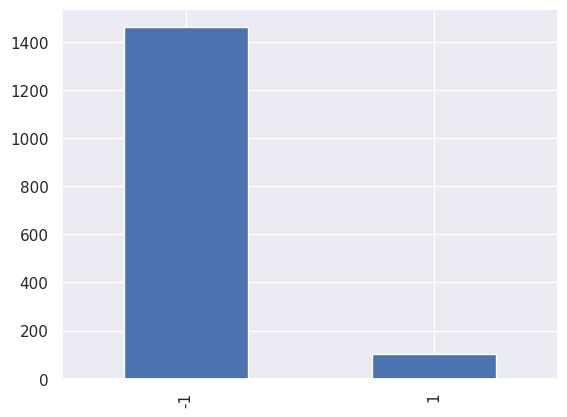

In [31]:
result['Pass/Fail'].value_counts().plot(kind='bar')
plt.show()

In [32]:
corr = result.corr()
print(corr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
corr.to_csv('correlation.csv')

In [35]:
result.columns

Index(['features_0', 'features_1', 'features_2', 'features_3', 'features_4', 'features_5', 'features_6', 'features_7', 'features_8', 'features_9',
       ...
       'features_582', 'features_583', 'features_584', 'features_585', 'features_586', 'features_587', 'features_588', 'features_589', 'Pass/Fail', 'Time'], dtype='object', length=592)

In [36]:
from datetime import datetime

In [38]:
result['year'] = pd.DatetimeIndex(result['Time']).year
result['month'] = pd.DatetimeIndex(result['Time']).month
result['date'] = pd.DatetimeIndex(result['Time']).day
result['week_day'] = pd.DatetimeIndex(result['Time']).weekday
result['start_time'] = pd.DatetimeIndex(result['Time']).time
result['hour'] = pd.DatetimeIndex(result['Time']).hour
result['mins'] = pd.DatetimeIndex(result['Time']).minute
result.head()

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45,features_46,features_47,features_48,features_49,features_50,features_51,features_52,features_53,features_54,features_55,features_56,features_57,features_58,features_59,features_60,features_61,features_62,features_63,features_64,features_65,features_66,features_67,features_68,features_69,features_70,features_71,features_72,features_73,features_74,features_75,features_76,features_77,features_78,features_79,features_80,features_81,features_82,features_83,features_84,features_85,features_86,features_87,features_88,features_89,features_90,features_91,features_92,features_93,features_94,features_95,features_96,features_97,features_98,features_99,features_100,features_101,features_102,features_103,features_104,features_105,features_106,features_107,features_108,features_109,features_110,features_111,features_112,features_113,features_114,features_115,features_116,features_117,features_118,features_119,features_120,features_121,features_122,features_123,features_124,features_125,features_126,features_127,features_128,features_129,features_130,features_131,features_132,features_133,features_134,features_135,features_136,features_137,features_138,features_139,features_140,features_141,features_142,features_143,features_144,features_145,features_146,features_147,features_148,features_149,features_150,features_151,features_152,features_153,features_154,features_155,features_156,features_157,features_158,features_159,features_160,features_161,features_162,features_163,features_164,features_165,features_166,features_167,features_168,features_169,features_170,features_171,features_172,features_173,features_174,features_175,features_176,features_177,features_178,features_179,features_180,features_181,features_182,features_183,features_184,features_185,features_186,features_187,features_188,features_189,features_190,features_191,features_192,features_193,features_194,features_195,features_196,features_197,features_198,features_199,features_200,features_201,features_202,features_203,features_204,features_205,features_206,features_207,features_208,features_209,features_210,features_211,features_212,features_213,features_214,features_215,features_216,features_217,features_218,features_219,features_220,features_221,features_222,features_223,features_224,features_225,features_226,features_227,features_228,features_229,features_230,features_231,features_232,features_233,features_234,features_235,features_236,features_237,features_238,features_239,features_240,features_241,features_242,features_243,features_244,features_245,features_246,features_247,features_248,features_249,features_250,features_251,features_252,features_253,features_254,features_255,features_256,features_257,features_258,features_259,features_260,features_261,features_262,features_263,features_264,features_265,features_266,features_267,features_268,features_269,features_270,features_271,features_272,features_273,features_274,features_275,features_276,features_277,features_278,features_279,features_280,features_281,features_282,features_283,features_284,features_285,features_286,features_287,features_288,features_289,features_290,features_291,features_292,features_293,features_294,features_295,features_296,features_297,features_298,features_299,features_300,features_301,features_302,features_303,features_304,features_305,features_306,features_307,features_308,features_309,features_310,features_311,features_312,features_313,features_314,features_315,f

In [39]:
result.year.unique()

array([2008])

In [40]:
result.month.unique()

array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [41]:
result.date.unique()

array([19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31,  8, 13, 15, 16, 17, 18,
       24,  9, 14, 26, 10])

In [42]:
result.week_day.unique()

array([5, 6, 0, 1, 2, 4, 3])

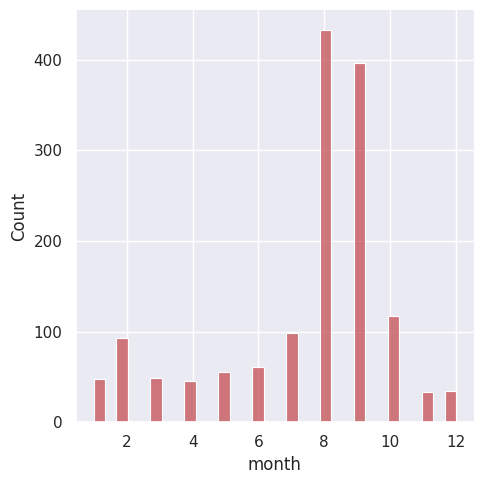

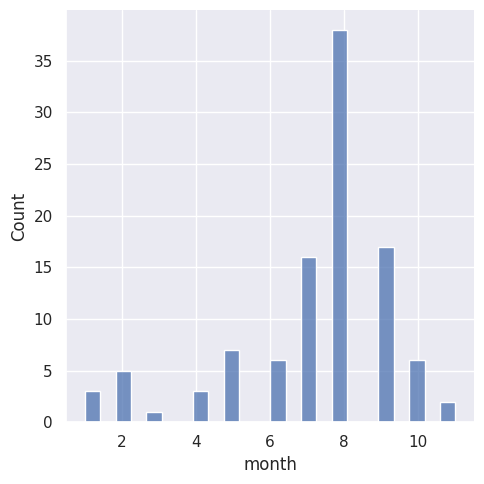

In [47]:
sns.displot(result[result['Pass/Fail'] == -1]['month'], color='r')
sns.displot(result[result['Pass/Fail'] == 1]['month'], color='b')
plt.show()

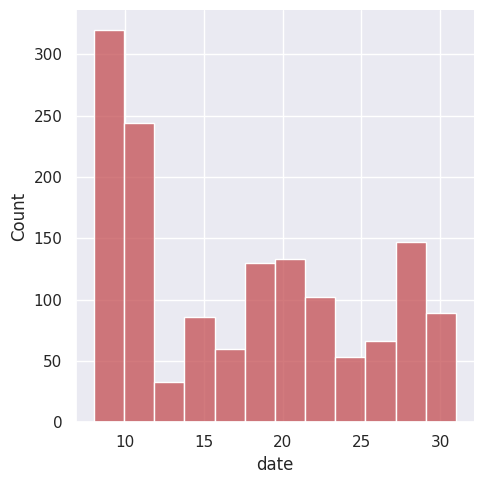

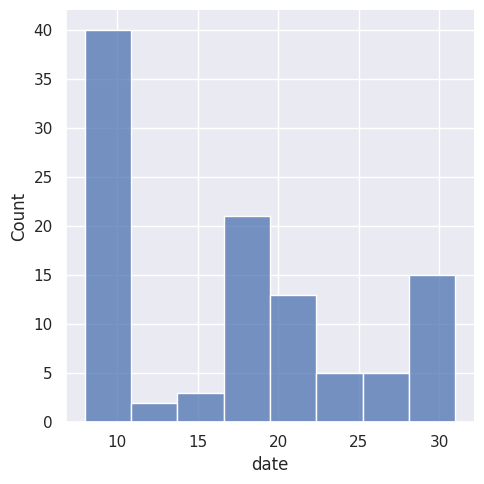

In [48]:
sns.displot(result[result['Pass/Fail'] == -1]['date'], color='r')
sns.displot(result[result['Pass/Fail'] == 1]['date'], color='b')
plt.show()

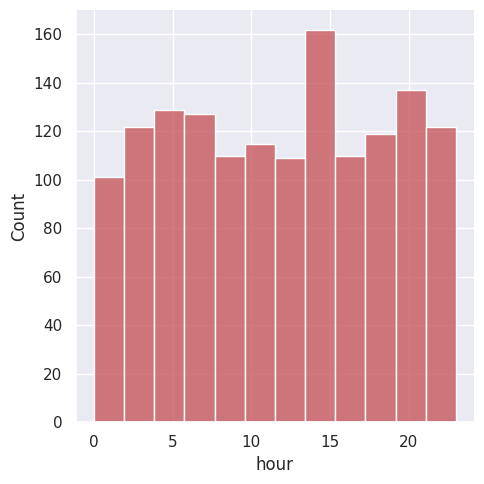

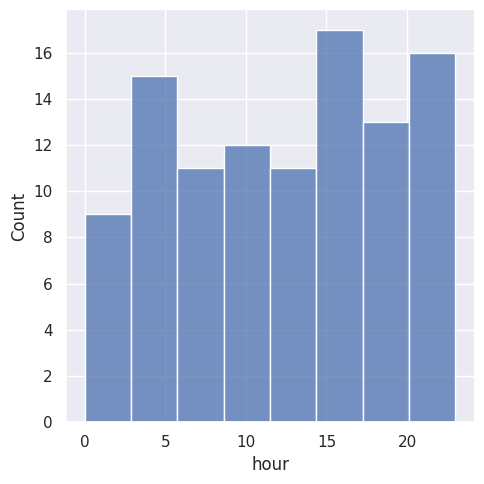

In [49]:
sns.displot(result[result['Pass/Fail'] == -1]['hour'], color='r')
sns.displot(result[result['Pass/Fail'] == 1]['hour'], color='b')
plt.show()

In [50]:
# dataprep, dtale, pandasprofiling, lux - can you please explore more
# split the data into ind and dep variable
x = result.drop(['Pass/Fail', 'Time', 'year', 'month', 'date', 'week_day', 'start_time', 'hour', 'mins'], axis=1)
y = result['Pass/Fail']

In [51]:
x.head(2)

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45,features_46,features_47,features_48,features_49,features_50,features_51,features_52,features_53,features_54,features_55,features_56,features_57,features_58,features_59,features_60,features_61,features_62,features_63,features_64,features_65,features_66,features_67,features_68,features_69,features_70,features_71,features_72,features_73,features_74,features_75,features_76,features_77,features_78,features_79,features_80,features_81,features_82,features_83,features_84,features_85,features_86,features_87,features_88,features_89,features_90,features_91,features_92,features_93,features_94,features_95,features_96,features_97,features_98,features_99,features_100,features_101,features_102,features_103,features_104,features_105,features_106,features_107,features_108,features_109,features_110,features_111,features_112,features_113,features_114,features_115,features_116,features_117,features_118,features_119,features_120,features_121,features_122,features_123,features_124,features_125,features_126,features_127,features_128,features_129,features_130,features_131,features_132,features_133,features_134,features_135,features_136,features_137,features_138,features_139,features_140,features_141,features_142,features_143,features_144,features_145,features_146,features_147,features_148,features_149,features_150,features_151,features_152,features_153,features_154,features_155,features_156,features_157,features_158,features_159,features_160,features_161,features_162,features_163,features_164,features_165,features_166,features_167,features_168,features_169,features_170,features_171,features_172,features_173,features_174,features_175,features_176,features_177,features_178,features_179,features_180,features_181,features_182,features_183,features_184,features_185,features_186,features_187,features_188,features_189,features_190,features_191,features_192,features_193,features_194,features_195,features_196,features_197,features_198,features_199,features_200,features_201,features_202,features_203,features_204,features_205,features_206,features_207,features_208,features_209,features_210,features_211,features_212,features_213,features_214,features_215,features_216,features_217,features_218,features_219,features_220,features_221,features_222,features_223,features_224,features_225,features_226,features_227,features_228,features_229,features_230,features_231,features_232,features_233,features_234,features_235,features_236,features_237,features_238,features_239,features_240,features_241,features_242,features_243,features_244,features_245,features_246,features_247,features_248,features_249,features_250,features_251,features_252,features_253,features_254,features_255,features_256,features_257,features_258,features_259,features_260,features_261,features_262,features_263,features_264,features_265,features_266,features_267,features_268,features_269,features_270,features_271,features_272,features_273,features_274,features_275,features_276,features_277,features_278,features_279,features_280,features_281,features_282,features_283,features_284,features_285,features_286,features_287,features_288,features_289,features_290,features_291,features_292,features_293,features_294,features_295,features_296,features_297,features_298,features_299,features_300,features_301,features_302,features_303,features_304,features_305,features_306,features_307,features_308,features_309,features_310,features_311,features_312,features_313,features_314,features_315,f

In [52]:
# Feature Scaling required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 0.13999828,  0.42920791,  0.03273532, ..., -1.86846064,
        -1.84076867, -1.0611589 ],
       [ 0.46402024, -0.10587396,  0.23685169, ...,  0.41258698,
         0.25102908,  1.15695081],
       [-0.35125598,  0.40723307,  0.02641324, ...,  3.62421124,
         3.31899911, -0.17840653],
       ...,
       [-0.12041844, -0.5678868 ,  0.12151173, ..., -0.89249002,
        -0.96918628, -0.59748491],
       [-0.53957345,  0.25606135, -0.01842658, ...,  0.91192079,
         0.77397852, -0.06511812],
       [-0.28974927, -0.18370602,  0.06960583, ..., -0.03000435,
        -0.27192036,  0.40672924]])

In [53]:
x = pd.DataFrame(x_scaler, columns = x.columns[:])
x.head(2)

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_40,features_41,features_42,features_43,features_44,features_45,features_46,features_47,features_48,features_49,features_50,features_51,features_52,features_53,features_54,features_55,features_56,features_57,features_58,features_59,features_60,features_61,features_62,features_63,features_64,features_65,features_66,features_67,features_68,features_69,features_70,features_71,features_72,features_73,features_74,features_75,features_76,features_77,features_78,features_79,features_80,features_81,features_82,features_83,features_84,features_85,features_86,features_87,features_88,features_89,features_90,features_91,features_92,features_93,features_94,features_95,features_96,features_97,features_98,features_99,features_100,features_101,features_102,features_103,features_104,features_105,features_106,features_107,features_108,features_109,features_110,features_111,features_112,features_113,features_114,features_115,features_116,features_117,features_118,features_119,features_120,features_121,features_122,features_123,features_124,features_125,features_126,features_127,features_128,features_129,features_130,features_131,features_132,features_133,features_134,features_135,features_136,features_137,features_138,features_139,features_140,features_141,features_142,features_143,features_144,features_145,features_146,features_147,features_148,features_149,features_150,features_151,features_152,features_153,features_154,features_155,features_156,features_157,features_158,features_159,features_160,features_161,features_162,features_163,features_164,features_165,features_166,features_167,features_168,features_169,features_170,features_171,features_172,features_173,features_174,features_175,features_176,features_177,features_178,features_179,features_180,features_181,features_182,features_183,features_184,features_185,features_186,features_187,features_188,features_189,features_190,features_191,features_192,features_193,features_194,features_195,features_196,features_197,features_198,features_199,features_200,features_201,features_202,features_203,features_204,features_205,features_206,features_207,features_208,features_209,features_210,features_211,features_212,features_213,features_214,features_215,features_216,features_217,features_218,features_219,features_220,features_221,features_222,features_223,features_224,features_225,features_226,features_227,features_228,features_229,features_230,features_231,features_232,features_233,features_234,features_235,features_236,features_237,features_238,features_239,features_240,features_241,features_242,features_243,features_244,features_245,features_246,features_247,features_248,features_249,features_250,features_251,features_252,features_253,features_254,features_255,features_256,features_257,features_258,features_259,features_260,features_261,features_262,features_263,features_264,features_265,features_266,features_267,features_268,features_269,features_270,features_271,features_272,features_273,features_274,features_275,features_276,features_277,features_278,features_279,features_280,features_281,features_282,features_283,features_284,features_285,features_286,features_287,features_288,features_289,features_290,features_291,features_292,features_293,features_294,features_295,features_296,features_297,features_298,features_299,features_300,features_301,features_302,features_303,features_304,features_305,features_306,features_307,features_308,features_309,features_310,features_311,features_312,features_313,features_314,features_315,f

from matplotlib import pyplot as plt
_df_0['features_0'].plot(kind='hist', bins=20, title='features_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['features_1'].plot(kind='hist', bins=20, title='features_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['features_2'].plot(kind='hist', bins=20, title='features_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['features_3'].plot(kind='hist', bins=20, title='features_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='features_0', y='features_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='features_1', y='features_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='features_2', y='features_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='features_3', y='features_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['features_0']
  ys = series['features_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('features_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('features_0')
_ = plt.ylabel('features_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['features_0']
  ys = series['features_4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('features_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('features_0')
_ = plt.ylabel('features_4')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['features_0']
  ys = series['features_8']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('features_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('features_0')
_ = plt.ylabel('features_8')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['features_0']
  ys = series['features_9']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('features_0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('features_0')
_ = plt.ylabel('features_9')

from matplotlib import pyplot as plt
_df_12['features_0'].plot(kind='line', figsize=(8, 4), title='features_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['features_1'].plot(kind='line', figsize=(8, 4), title='features_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['features_2'].plot(kind='line', figsize=(8, 4), title='features_2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['features_3'].plot(kind='line', figsize=(8, 4), title='features_3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [54]:
# imbalance treatement required
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print("imbalance data", y.value_counts())
print("balanced data", y_ros.value_counts())

imbalance data -1    1463
 1     104
Name: Pass/Fail, dtype: int64
balanced data -1    1463
 1    1463
Name: Pass/Fail, dtype: int64


In [55]:
# pca method - dimention reduction concept
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x_ros)
print(x_pca.shape, x_ros.shape)

(2926, 141) (2926, 590)


In [56]:
# Split the data into training and test for model building and evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_ros, test_size=0.25, random_state=42)

# Trandition Algorithm - RandomForest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [58]:
rforest = RandomForestClassifier(n_estimators=100, criterion='entropy')
rforest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [59]:
y_pred_train = rforest.predict(x_train)
y_pred_test = rforest.predict(x_test)

# Evaluate the model

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [61]:
print(confusion_matrix(y_train, y_pred_train))
print("*******************8"*10)
print(confusion_matrix(y_test, y_pred_test))

[[1092    0]
 [   0 1102]]
*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8
[[371   0]
 [  0 361]]


In [62]:
print(classification_report(y_train, y_pred_train))
print("*******************8"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1092
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2194
   macro avg       1.00      1.00      1.00      2194
weighted avg       1.00      1.00      1.00      2194

*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       361

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



In [63]:
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("*******************8"*10)
print("Test Accuracy",accuracy_score(y_test, y_pred_test))

Training Accuracy 1.0
*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8*******************8
Test Accuracy 1.0


In [ ]:
# Cross validation method - k-fold = 10

In [65]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(rforest, x_train, y_train, cv=10)
test = cross_val_score(rforest, x_test, y_test, cv=10)
print("Training Accuracy", training.mean())
print("*****************8*"*5)
print("Test Accuracy", test.mean())

Training Accuracy 0.9995433789954339
*****************8******************8******************8******************8******************8*
Test Accuracy 0.9917993335801555


# Deep Neural Network (Multilayer Perceptron) - ANN

In [66]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *

In [70]:
dnn  = Sequential()
dnn.add(Dense(8, activation='relu'))
#dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
69/69 [==============================] - 1s 6ms/step - loss: 0.6411 - accuracy: 0.2106 - val_loss: 0.2346 - val_accuracy: 0.2063
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: -0.0537 - accuracy: 0.2060 - val_loss: -0.3095 - val_accuracy: 0.1995
Epoch 3/100
69/69 [==============================] - 0s 4ms/step - loss: -0.7047 - accuracy: 0.2124 - val_loss: -0.8989 - val_accuracy: 0.1749
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: -1.4460 - accuracy: 0.2147 - val_loss: -1.6240 - val_accuracy: 0.1817
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: -2.3575 - accuracy: 0.2293 - val_loss: -2.5192 - val_accuracy: 0.2036
Epoch 6/100
69/69 [==============================] - 0s 4ms/step - loss: -3.4987 - accuracy: 0.2625 - val_loss: -3.6626 - val_accuracy: 0.2281
Epoch 7/100
69/69 [==============================] - 0s 4ms/step - loss: -4.9123 - accuracy: 0.2844 - val_loss: -5.0610 - val_accuracy: 0.2432
E